Refer to the instructions on Canvas for more information.

"I have neither given nor received help on this assignment."

author: Goral Pahuja

You should use the code cell below to load your data.

In [45]:
# Retrieving Data
import requests
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt

# Retrieves the 'Graduates' dataset's JSON File from the CORGIS Collection
data_dict = requests.get('https://think.cs.vt.edu/corgis/datasets/json/graduates/graduates.json').json()

# Prints out a sample of the JSON File/dataset
pprint(data_dict[0])

{'Demographics': {'Ethnicity': {'Asians': 84495,
                                'Minorities': 115016,
                                'Whites': 1094775},
                  'Gender': {'Females': 551695, 'Males': 743903},
                  'Total': 1295598},
 'Education': {'Degrees': {'Bachelors': 671374,
                           'Doctorates': 90543,
                           'Masters': 248813,
                           'Professionals': 284869},
               'Major': 'Biological Sciences'},
 'Employment': {'Employer Type': {'Business/Industry': 669270,
                                  'Educational Institution': 300468,
                                  'Government': 121117},
                'Reason Working Outside Field': {'Career Change': 98112,
                                                 'Family-related': 65619,
                                                 'Job Location': 90842,
                                                 'No Job Available': 76598,
               

You should use this markdown cell to state the source of your data and to explain why it is important.

* The source of my data is the CORGIS Collection of JSON Datasets. I believe this data is important, because it includes information about employment numbers, major information, and the earnings of different majors. This can influence many students to transfer into a new major if the motivating factor for them is the average salary or the demographics of a major based off of ethnicity.

You should use the code cell below to process your data, in particular converting the data into pandas DataFrames.

In [46]:
# Data Cleaning and Preprocessing

# Converts the JSON File into a Pandas Dataframe
data = pd.json_normalize(data_dict)
# Creates a new Pandas Dataframe and groups the original Pandas Dataframe by major and finds the mean of each
# of the demographics over the all of the years provided in the data (1993 - 2015). In order to make the models
# relative to the majors rather than the individual years.
grouped_data = data.groupby('Education.Major').mean().copy()
# Resets the index of the new Pandas Dataframe
grouped_data = grouped_data.reset_index()
# Calculates the ratio of female students of the entire dataset
grouped_data['FemRatio'] = grouped_data['Demographics.Gender.Females'] / grouped_data['Demographics.Total']
# Displays the first 5 rows of the new 'grouped_data' Pandas Dataframe
grouped_data.head()

,Education.Major,Year,Demographics.Total,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Degrees.Bachelors,Education.Degrees.Doctorates,...,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching,FemRatio
0,Agricultural Economics,2003.636364,30633.363636,875.545455,2323.090909,27434.636364,6706.454545,23927.000000,23982.181818,476.363636,...,5848.818182,10801.363636,18191.090909,2199.363636,6195.727273,9500.727273,9464.909091,19002.363636,4610.363636,0.218926
1,Animal Sciences,2003.636364,60484.818182,1978.272727,5457.363636,53049.090909,22600.454545,37884.363636,38721.636364,3353.545455,...,12978.090909,15926.000000,31478.727273,5405.909091,18114.545455,18602.454545,19013.181818,27710.090909,15334.272727,0.373655
2,Anthropology and Archeology,2003.636364,91918.909091,3071.272727,11868.909091,76978.818182,58596.000000,33323.000000,49042.272727,5324.000000,...,16603.272727,22350.727273,43109.363636,12339.727273,8113.363636,23057.909091,17152.727273,27984.818182,27100.727273,0.637475
3,Area and Ethnic Studies,2003.636364,68740.090909,4511.727273,16629.636364,47598.727273,46758.181818,21981.818182,34381.181818,3323.545455,...,12531.818182,15906.363636,30625.181818,8635.636364,2879.363636,20566.090909,11255.181818,19953.545455,23672.545455,0.680217
4,Atmospheric Sciences and Meteorology,2003.636364,9687.909091,780.636364,535.363636,8371.636364,3285.727273,6402.000000,6084.272727,866.363636,...,3792.818182,1030.818182,3454.363636,650.545455,1804.909091,2472.090909,2531.090909,2260.090909,1306.909091,0.339158


In [47]:
# Creates a new function to assign a value of 0 to a major if it's not considered to be a part of STEM,
# and a 1 to a major if it's considered to be a part of STEM
def stem_major(major):
    
    stem = ['Atmospheric Sciences and Meteorology', 'Biochemistry and Biophysics',
       'Biological Sciences', 'Chemical Engineering', 'Chemistry',
       'Civil Engineering', 'Computer Science and Math', 'Economics', 'Electrical Engineering',
        'Genetics, Animal and Plant', 'Geology', 'Information Services and Systems',
            'Mechanical Engineering', 'OTHER Geological Sciences',
       'OTHER Physical and Related Sciences', 'Operations Research', 'Other Engineering',
       'Pharmacology, Human and Animal', 'Physics and Astronomy', 
       'Plant Sciences', 'Statistics', 'Zoology, General']
    
    if major in stem:
        return 1
    return 0

# grouped_data['STEM'] = grouped_data['Education.Major'].apply(stem_major).astype('category')

stem_list = []
for entry in grouped_data['Education.Major']:
    stem = stem_major(entry)
    stem_list.append(stem)
# Creates a new column in the 'grouped_data' Pandas Dataframe that displays a value of 0 or 1
# depicting whether the specified major is considered a STEM Major or not
grouped_data['STEM'] = pd.Series(stem_list).astype('category')

You should use the code cell below to run your first machine learning technique.

In [48]:
# Analyzing Data 1
# K means clustering - unsupervised - many dimensions
from sklearn.cluster import KMeans

# Extracts the columns that contains numbers and forms a new Pandas Dataframe using those columns
data_numerical = grouped_data.select_dtypes('number')

# Converts the columns of the newly created Pandas Dataframe into a list in order to efficiently
# remove the columns that won't be included in the calculations, because they will affect the
# accuracy of the analysis
features = data_numerical.columns.to_list()
features.remove('Salaries.Mean')
features.remove('Salaries.Median')
features.remove('Salaries.Standard Deviation')
features.remove('Salaries.Highest')
features.remove('Salaries.Quantity')
features.remove('Salaries.Lowest')
features.remove('Year')

# Uses the KMeans clustering technique on the dataframe using 4 clusters
model = KMeans(n_clusters=4, random_state=0)

model.fit(data_numerical[features])
# Assigns labels to the Dataframe
grouped_data['Cluster_center'] = model.labels_
grouped_data['Cluster_center'] = grouped_data['Cluster_center'].astype('category')

You should use the code cell below to run your second machine learning technique.

In [49]:
# Analyzing Data 2
# Decision Tree - Supervised Learning Classifier
from sklearn.tree import DecisionTreeClassifier

# Converts the columns of the newly created Pandas Dataframe into a list in order to efficiently
# remove the columns that won't be included in the calculations, because they will affect the
# accuracy of the analysis
features = grouped_data.columns.tolist()
features.remove('Education.Major')
features.remove('Year')
features.remove('STEM')
target = 'STEM'

# Creates two separate Pandas Dataframe sets to use for testing and training purposes
train = grouped_data.iloc[:int(len(grouped_data)*.8)].copy()
test = grouped_data.iloc[int(len(grouped_data)*.8):].copy()

# Uses the Decision Tree technique on the dataframe
model = DecisionTreeClassifier()
model.fit(train[features],train[target])

# Calculates a prediction based off of the inputted data and assigns it to a new column in the 'test' Pandas Dataframe
test['Predicted_STEM'] = model.predict(test[features])
# Displays the Decision Tree
test[['Education.Major','STEM', 'Predicted_STEM']]

,Education.Major,STEM,Predicted_STEM
37,Physics and Astronomy,1,1
38,"Physiology, Human and Animal",0,0
39,Plant Sciences,1,0
40,Political Science and Government,0,1
41,Political and related sciences,0,0
42,Psychology,0,1
43,Public Policy Studies,0,0
44,Sociology,0,0
45,Statistics,1,1
46,"Zoology, General",1,0


You should use the code cell below to run your third machine learning technique.

In [50]:
# Analyzing Data 3
# Linear Regression - Supervised
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Converts the 'Cluster_center' column type to an integer
grouped_data['Cluster_center'] = grouped_data['Cluster_center'].astype('int')
# Calculates the correlation coefficients and sorts the top 10 values in descending order based off of
# the mean salaries and converts them into a list
features = grouped_data.corr().abs()['Salaries.Mean'].sort_values(ascending=False).head(10).index.to_list()
# Removes the columns that won't be included in the calculations, because they will affect the accuracy
# of the analysis
features.remove('Salaries.Mean')
features.remove('Salaries.Median')
features.remove('Salaries.Standard Deviation')
features.remove('Salaries.Highest')
features.remove('Salaries.Quantity')

# Stores the name of the 'target' column's label
target = 'Salaries.Mean'

# Uses the Linear Regression technique
model = LinearRegression()
model.fit(train[features], train[target])
# Calculates a prediction based off of the inputted data and assigns it to a new Pandas Dataframe
predictions = model.predict(test[features])

You should use the code cell below to run your first visualization.

Text(0, 0.5, 'Mean Salary')

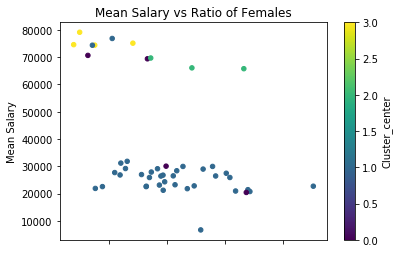

In [51]:
# Visualizing Data 1
# Plots the KMeans Cluster technique using a Scatterplot
grouped_data.plot.scatter(x='FemRatio',y='Salaries.Mean',c='Cluster_center', colormap='viridis')
plt.title('Mean Salary vs Ratio of Females')
plt.xlabel('Ratio of Females')
plt.ylabel('Mean Salary')

You should use the code cell below to run your second visualization.

Text(0.5, 1.0, 'Predicted vs Real Mean Salary')

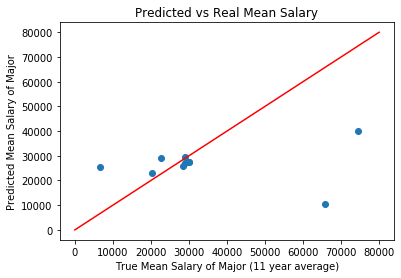

In [52]:
# Visualizing Data 2
# Plots the Linear Regression technique using a Scatterplot
plt.scatter(test['Salaries.Mean'], predictions)
plt.plot([0,80000],[0,80000],'r-')
plt.xlabel('True Mean Salary of Major (11 year average)')
plt.ylabel('Predicted Mean Salary of Major')
plt.title('Predicted vs Real Mean Salary')

You should use this markdown cell to discuss your stakeholders for each machine learning technique.
* KMeans Clustering
    * STEM-inclined companies such as Lockheed Martin and Northrop Grumman, should use this analysis in order to provide more incentives (i.e. work benefits, increased salaries, etc.) to their employees. This will attract more students to switch over to a STEM-major and/or to join a STEM-inclined company. This will benefit the STEM-inclined companies, because they will have an influx of potential employees to hire. Then they can form teams using the newly hired employees and start new projects with them. This will improve the overall efficiency of the company.
* Decision Tree
    * College students, Parents, and Academic advisors can use this analysis in order to figure out if a major is considered a STEM major or not. This is based off of various factors/Dataframe columns considered in the Decision Tree calculations. This can help academic advisors provide better insight to their students on what classes they should take, what scholarships they're eligible for, and what they should do next to make the most out of their classes, their major, and their 4 years at Virginia Tech.
* Linear Regression
    * Statisticians and Accountants from the STEM-inclined company can use this analysis in order to verify if they're paying over or under the expected salary for a certain major. This can help them modify a certain job's salary in order to pay their employees the "true" amount that they should be receiving. If they don't modify the job's salary, they can notify the manager, who can then provide raises or bonuses to the employees in order to match their current salary with the "true" salary for their job/position.

You should use this markdown cell to describe a potential ethical issue from your analysis.
* An ethical issue that results from the KMeans Clustering analysis is that the analysis only compares the Ratio of Female Students with Average Salaries. The analysis doesn't compare the Ratio of Male Students with Average Salaries. This may result in female employees receiving more benefits/incentives than male employees, instead of both genders receiving equal benefits/incentives. An ethical consideration that results from the stakeholder receiving this data is that male students may be less-inclined to join a specific STEM-inclined company (i.e. the stakeholder), because they're offering less incentives to male employees. An ethical consideration that results from the stakeholder not receiving this data is that the stakeholder may not create more incentives for its employees. Therefore, more female students won't be influenced to join the stakeholder (i.e. the STEM-inclined company), and the stakeholder won't have an influx of newly hired employees. This will then slow down the efficiency of their company, and new company projects won't be started. If the stakeholder receives inaccurate results, the stakeholder may enable incorrect incentives in their company policy and/or an incorrect amount of incentives, which can decrease the number of female and male student candidates that would like to apply for a job at the company.